<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/Submit_Cubic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [ ]:
##CHUNK 11 6 50_c
##CHUNK 2 6 50_c
##CHUNK 1 2 50_c


In [ ]:
temp_label = input("Enter temp: ")

Enter temp: 50.0


In [ ]:
loc = '50.0'

In [ ]:
path = f'/content/drive/MyDrive/A_132/{loc}'
%cd $path

/content/drive/MyDrive/A_132/50.0


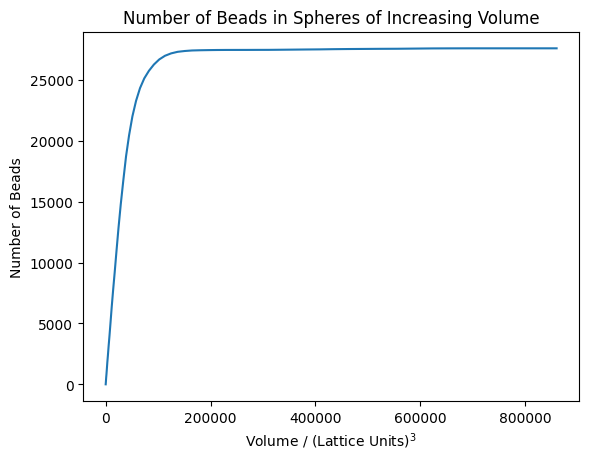

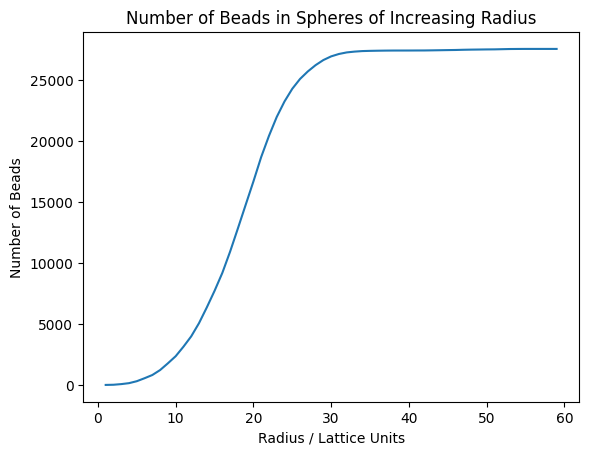

In [ ]:
seqs = ['Sequence_WT_2']
runs = ['Run_1']
temps = ['50.0']
runs_n = 1
import math
for i in list(seqs):
    sequence_with_space = i.replace('_', ' ')
    for temp in list(temps):
        distances_per_temp = []  # Collect distances for each run at a specific temperature
        for j in range(1, runs_n + 1):
            run_path = f'Run_{j}'
            file_path = f'results_trj.lammpstrj'

             # Initialize lists to store particle coordinates
            x_coords, y_coords, z_coords = [], [], []
            start_processing = False

            # Open the file and read lines
            with open(file_path, 'r') as file:
                for line in file:
                    if line.startswith('ITEM: TIMESTEP'):
                        timestep_value = next(file).strip()

                        if timestep_value == '2402000000':
                            start_processing = True
                        else:
                            start_processing = False
                            continue

                    if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
                        continue

                    if start_processing:
                        items = line.split()
                        if len(items) >= 7:
                            x_coords.append(float(items[3]))
                            y_coords.append(float(items[4]))
                            z_coords.append(float(items[5]))

            x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
            coordinates = np.column_stack((x_coords, y_coords, z_coords))
            center = np.array([60, 60, 60])

            # Calculate distances for the current run
            distances = np.linalg.norm(coordinates - center, axis=1)
            distances = np.abs(distances)
            distances = np.sqrt((x_coords - 60)**2 + (y_coords - 60)**2 + (z_coords - 60)**2)

            distances_per_temp.append(distances)

            # Specify the maximum radius
            max_radius = 60
            max_radius = int(max_radius)
            #adjust = 1/np.sqrt(3)
            adjust = 1
            radii = list(np.arange(adjust, max_radius, adjust))
            volumes = list((4/3) * np.pi * radius**3 for radius in radii)
            radii = list(np.arange(adjust, max_radius, adjust))
            # Count the number of particles within each sphere of increasing radius
            particle_counts = [np.sum(distances <= radius) for radius in radii]

#particle_counts_str = ' '.join(map(str, particle_counts))
#radii_str = ' '.join(map(str, radii))
#no_e_path = f'/content/drive/MyDrive/A_132/NO_E/NO_E_particle_counts.txt'

#with open(no_e_path, 'w') as file:
      #file.write(f"Number of Particles: {particle_counts_str}\nRadii: {radii_str}")

label_1 = f'$^3$'

plt.plot(volumes, particle_counts)
plt.xlabel(f'Volume / (Lattice Units){label_1}')
plt.ylabel('Number of Beads')
plt.title(f'Number of Beads in Spheres of Increasing Volume')
save_path_2 = f'beads_in_volumes.png'
plt.savefig(save_path_2)
plt.show()


plt.plot(radii, particle_counts)
#plt.axvline(x=29, color='red', linestyle='--', label='Vertical Line at x=29')
plt.xlabel(f'Radius / Lattice Units')
plt.ylabel('Number of Beads')
plt.title(f'Number of Beads in Spheres of Increasing Radius')
save_path_2 = f'beads_in_radius.png'
plt.savefig(save_path_2)
plt.show()



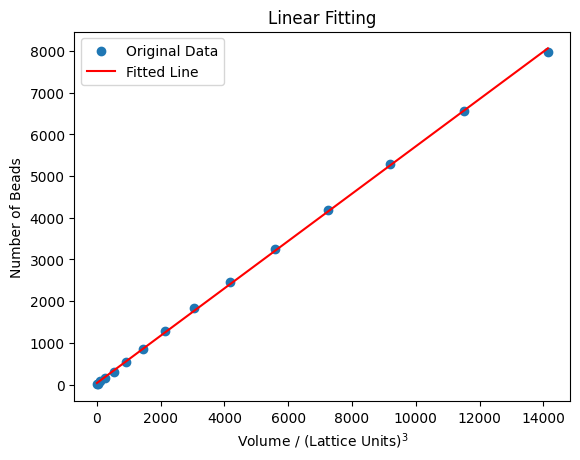

0.5679288416407791


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function for linear fitting and plotting
def fit_and_plot(volumes, counts):
    # Scale the input data
    scaled_volumes = np.array(volumes)  # Adjust the scaling factor as needed

    # Perform linear fitting with numpy.polyfit
    coeffs = np.polyfit(scaled_volumes, counts, 1)

    # Extract the optimized parameters
    slope, intercept = coeffs

    # Generate the fitted line
    fitted_line = slope * scaled_volumes + intercept

    # Plot the original data and the fitted line
    plt.scatter(volumes, counts, label='Original Data')
    plt.plot(volumes, fitted_line, label='Fitted Line', color='red')

    # Add labels and title
    plt.xlabel(f'Volume / (Lattice Units){label_1}')
    plt.ylabel('Number of Beads')
    plt.title(f'Linear Fitting')
    plt.legend()
    save_path_1 = f'linear_approx_den.png'
    plt.savefig(save_path_1)
    #plt.ylim(0, max(counts) + 10000)
    # Show the plot
    plt.show()

    # Return the optimized parameters
    print(slope)
    return slope, intercept

def fit_and_plot_y_axis(volumes, counts, i):

    scaled_volumes = np.array(volumes)  # Adjust the scaling factor as needed

    # Perform linear fitting with numpy.polyfit
    coeffs = np.polyfit(scaled_volumes, counts, 1)

    # Extract the optimized parameters
    slope, intercept = coeffs

    # Generate the fitted line
    fitted_line = slope * scaled_volumes + intercept


    # Plot the original data and the fitted line
    plt.scatter(volumes, counts, label='Original Data')
    plt.plot(volumes, fitted_line, label='Fitted Line', color='red')

    # Add labels and title
    plt.xlabel(f'Volume / (Lattice Units){label_1}')
    plt.ylabel('Number of Beads')
    plt.title(f'Linear Fitting')
    plt.legend()
    save_path_1 = f'linear_approx_dil_{i}.png'
    plt.savefig(save_path_1)
    plt.ylim(25000, max(counts) + 2000)
    # Show the plot
    plt.show()

    # Return the optimized parameters
    print(slope)
    dil_dict[i] = slope
    return slope, intercept
st_1 = 0
ed_1 = 15
truncated_particle_counts = particle_counts[st_1:ed_1]
trunacted_volumes = volumes[st_1:ed_1]
slope, intercept = fit_and_plot(trunacted_volumes, truncated_particle_counts)


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
dx = np.gradient(volumes)
dy = np.gradient(particle_counts)
gradient = dy / dx
d_gradient = np.gradient(gradient, volumes)
# Define the function
def custom_function(x, grad, second_grad, xmid, delta):
    term1 = 0.5 * (np.log10(d_gradient) + np.log10(gradient))
    term2 = np.tanh(2 * (x - xmid) / delta)

    return np.exp(term1 - term1 * term2)

x_data = np.array(volumes)
y_data = np.array(particle_counts)

params, covariance = curve_fit(custom_function, x_data, y_data, gradient, d_gradient)

# Extract the fitted parameters
xmid_fit, delta_fit = params

# Generate y values using the fitted parameters
y_fit = custom_function(x_data, xmid_fit, delta_fit)
exp_y_fit = np.exp(y_fit)
# Plot the original data and the fitted curve
#plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_data, exp_y_fit, label='Fitted Curve', linestyle='--', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
#plt.xlim(right=15000)
plt.show()

# Print the fitted parameters
print(f"Fitted xmid: {xmid_fit}")
print(f"Fitted delta: {delta_fit}")
print(f"Fitted a: {a_fit}")
print(f"Fitted b: {b_fit}")
print(f"Fitted c: {c_fit}")


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma


TypeError: custom_function() takes 5 positional arguments but 60 were given

[5.11569460e-01 6.33559100e-01 5.88304879e-01 5.43238046e-01
 6.04684077e-01 6.16542887e-01 5.90378809e-01 5.98067992e-01
 5.75795189e-01 5.63122971e-01 5.67317414e-01 5.65128695e-01
 5.60880191e-01 5.42315740e-01 5.17724438e-01 4.98109440e-01
 4.75402049e-01 4.30601632e-01 3.94437043e-01 3.74199642e-01
 3.26093332e-01 2.75372008e-01 2.24826402e-01 1.74872529e-01
 1.37436571e-01 9.60106705e-02 6.09924222e-02 4.23590238e-02
 3.05036465e-02 1.85612022e-02 1.14233957e-02 7.76870858e-03
 4.85792704e-03 2.71834257e-03 1.62358824e-03 1.01287859e-03
 4.35855187e-04 2.20385335e-04 3.92307868e-04 4.22667262e-04
 2.60314885e-04 2.70620534e-04 2.36666958e-04 1.02742475e-04
 5.89365737e-05 7.52031547e-05 3.60187711e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Fitted xmid: 152.72779216557467
Fitted delta: 14.803823601542945


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


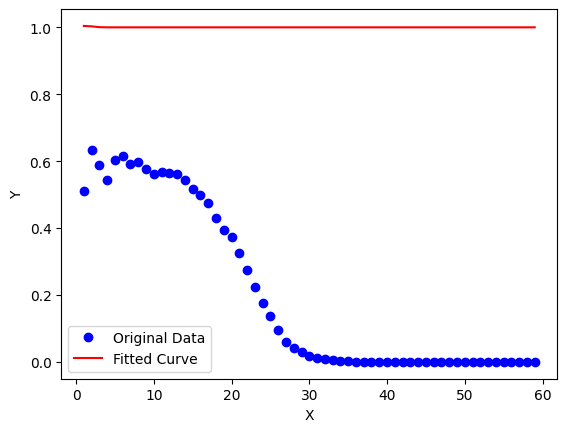

In [ ]:
def custom_function(x, xmid, delta):
    y_prime = np.gradient(y, x)
    y_double_prime = np.gradient(y_prime, x)
    term1 = 0.5 * np.log1p(np.abs(y_double_prime)) + 0.5 * np.log1p(np.abs(y_prime))
    term2 =  term1*np.tanh(2 * (x - xmid) / delta)
    return term1 - term2


x_data = volumes
y_data = particle_counts
dx = np.gradient(x_data)
dy = np.gradient(y_data)
gradient_use = dy / dx
print(gradient_use)

y = np.array(gradient_use)
x = np.array(radii)
y_prime_data = np.gradient(y, x)
y_double_prime_data = np.gradient(y_prime_data, x)

# Initial guess for the parameters xmid and delta
#initial_guess = [np.log10(22), 0.1]  # adjust these values based on your problem
initial_guess = [0.5, 10]

# Perform the curve fitting
params, covariance = curve_fit(custom_function, x, y, p0=initial_guess)

# Extract the fitted parameters
xmid_fit, delta_fit = params

# Print the fitted parameters
print(f"Fitted xmid: {xmid_fit}")
print(f"Fitted delta: {delta_fit}")


y_fit = np.exp(custom_function(x_data, xmid_fit, delta_fit))
plt.plot(x, y, label='Original Data', marker='o', linestyle='', color='blue')
plt.plot(x, y_fit, label='Fitted Curve', linestyle='-', color='red')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()




[5.11569460e-01 6.33559100e-01 5.88304879e-01 5.43238046e-01
 6.04684077e-01 6.16542887e-01 5.90378809e-01 5.98067992e-01
 5.75795189e-01 5.63122971e-01 5.67317414e-01 5.65128695e-01
 5.60880191e-01 5.42315740e-01 5.17724438e-01 4.98109440e-01
 4.75402049e-01 4.30601632e-01 3.94437043e-01 3.74199642e-01
 3.26093332e-01 2.75372008e-01 2.24826402e-01 1.74872529e-01
 1.37436571e-01 9.60106705e-02 6.09924222e-02 4.23590238e-02
 3.05036465e-02 1.85612022e-02 1.14233957e-02 7.76870858e-03
 4.85792704e-03 2.71834257e-03 1.62358824e-03 1.01287859e-03
 4.35855187e-04 2.20385335e-04 3.92307868e-04 4.22667262e-04
 2.60314885e-04 2.70620534e-04 2.36666958e-04 1.02742475e-04
 5.89365737e-05 7.52031547e-05 3.60187711e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Fitted xmid: 152.72779216557467
Fitted delta: 14.803823601542945


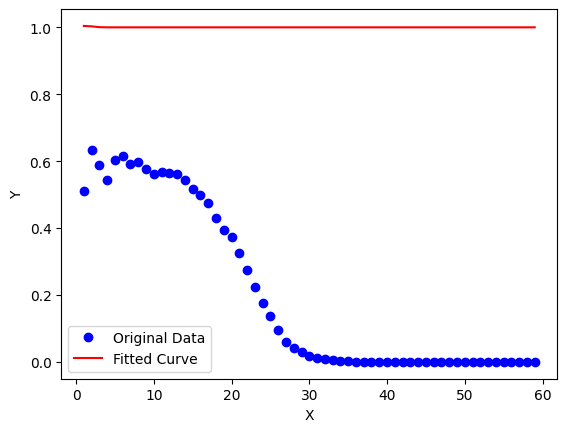

In [ ]:
def custom_function(x, xmid, delta):
    y_prime = np.gradient(y, x)
    y_double_prime = np.gradient(y_prime, x)
    term1 = 0.5 * np.log1p(np.abs(y_double_prime)) + 0.5 * np.log1p(np.abs(y_prime))
    term2 =  term1*np.tanh(2 * (x - xmid) / delta)
    return term1 - term2


x_data = volumes
y_data = particle_counts
dx = np.gradient(x_data)
dy = np.gradient(y_data)
gradient_use = dy / dx
print(gradient_use)

y = np.array(gradient_use)
x = np.array(radii)
y_prime_data = np.gradient(y, x)
y_double_prime_data = np.gradient(y_prime_data, x)

# Initial guess for the parameters xmid and delta
#initial_guess = [np.log10(22), 0.1]  # adjust these values based on your problem
initial_guess = [0.5, 10]

# Perform the curve fitting
params, covariance = curve_fit(custom_function, x, y, p0=initial_guess)

# Extract the fitted parameters
xmid_fit, delta_fit = params

# Print the fitted parameters
print(f"Fitted xmid: {xmid_fit}")
print(f"Fitted delta: {delta_fit}")


y_fit = np.exp(custom_function(x_data, xmid_fit, delta_fit))
plt.plot(x, y, label='Original Data', marker='o', linestyle='', color='blue')
plt.plot(x, y_fit, label='Fitted Curve', linestyle='-', color='red')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()




In [ ]:
def custom_function(x, xmid, delta):
    y_prime = np.gradient(y, x)
    y_double_prime = np.gradient(y_prime, x)
    term1 = 0.5 * np.log1p(np.abs(y_double_prime)) + 0.5 * np.log1p(np.abs(y_prime))
    term2 =  term1*np.tanh(2 * (x - xmid) / delta)
    return term1 - term2


x_data = volumes
y_data = particle_counts
dx = np.gradient(x_data)
dy = np.gradient(y_data)
gradient_use = dy / dx
gradient_use = gradient_use[2:]

y = np.array(gradient_use)
x = np.array(radii[2:])
y_prime_data = np.gradient(y, x)
y_double_prime_data = np.gradient(y_prime_data, x)

# Initial guess for the parameters xmid and delta
#initial_guess = [np.log10(22), 0.1]  # adjust these values based on your problem
initial_guess = [-20, -5]

# Perform the curve fitting
params, covariance = curve_fit(custom_function, x, y, p0=initial_guess)

# Extract the fitted parameters
xmid_fit, delta_fit = params

# Print the fitted parameters
print(f"Fitted xmid: {xmid_fit}")
print(f"Fitted delta: {delta_fit}")


y_fit = np.exp(custom_function(x_data, xmid_fit, delta_fit))
plt.plot(x, y, label='Original Data', marker='o', linestyle='', color='blue')
plt.plot(x, y_fit, label='Fitted Curve', linestyle='-', color='red')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()



Fitted xmid: -42.83009438448829
Fitted delta: -0.5226061723034281


ValueError: when 1d, distances must match the length of the corresponding dimension

In [ ]:
volumes_2 = volumes[2:]
particle_counts_2 = particle_counts[2:]
radii_2 = radii[2:]

59


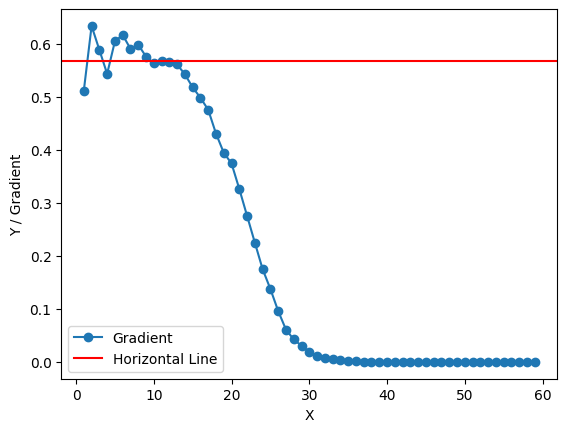

In [ ]:
##derivative calc
x = volumes
y = particle_counts
dx = np.gradient(x)
dy = np.gradient(y)
gradient = dy / dx
print(len(gradient))
plt.plot(radii, gradient, label='Gradient', marker='o')
plt.axhline(slope, color='red', linestyle='-', label='Horizontal Line')
plt.xlabel('X')
plt.ylabel('Y / Gradient')
plt.legend()
#plt.xlim(right=150000)
#plt.ylim(top=0.7)
plt.show()

In [ ]:
##Dao's code
def segment_fit(x, x0, a, b):
  _ = (x > x0).astype(int)
  return x * a * (1 - _) + (a * x0 + (x - x0) * b) * _

(0.0, 500000.0)

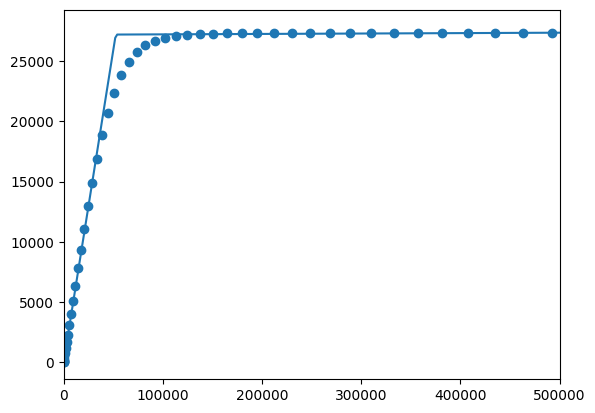

In [ ]:
##Minimises hte abolute error instead of the square of the error to diminish the value of the points in the dodgy region - Dao's code
st_2 = 0
ed_2 = 60
y = np.array(particle_counts)
x = np.array(volumes)

def cost(para):
  return np.sum(np.abs(y - segment_fit(x, *para)))
res = minimize(cost, x0 = (50000, 1, 0))

plt.figure()
plt.scatter(x, y)
__ = np.linspace(0, 2e6, 1000)
plt.plot(__, segment_fit(__, *res.x))
plt.xlim(0, 5e5)

In [ ]:
print(res.x)

den_dao = res.x[1]
dil_dao = res.x[2]

path = 'DAO_den_dil_concs.text'

with open(path, 'w') as file:
      file.write(f"The dense phase concentration is: {den_dao}\nThe dilute phase concentration is: {dil_dao}")

[5.25761646e+04 5.17152329e-01 3.43803888e-04]


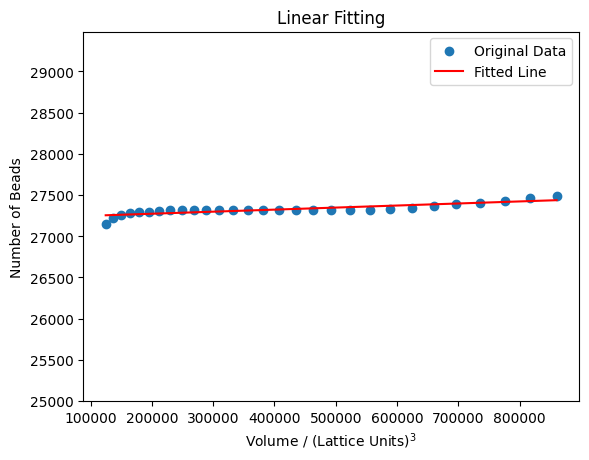

0.0002487712987262513
0.0002487712987262513


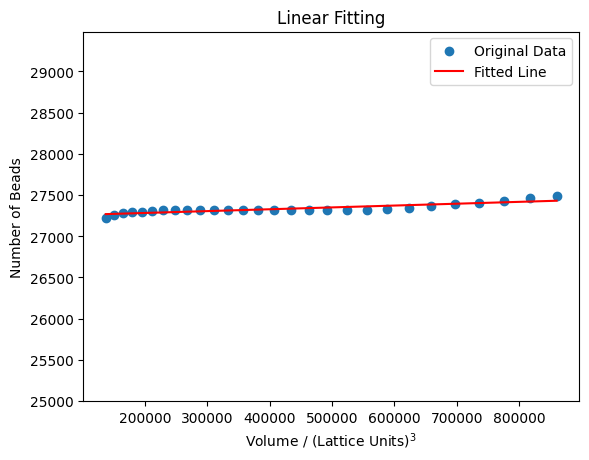

0.00022454558845269148
0.00022454558845269148


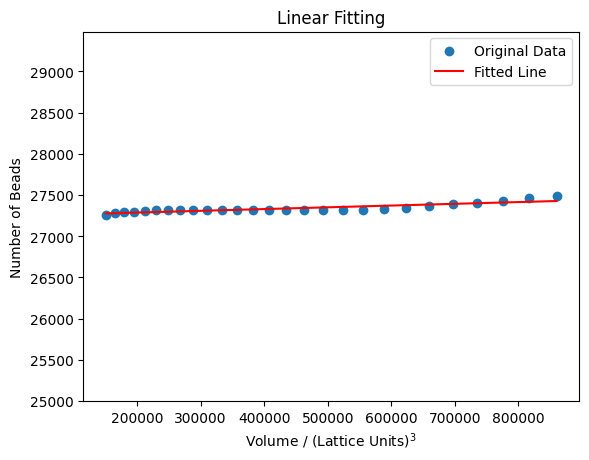

0.00021215603875246125
0.00021215603875246125


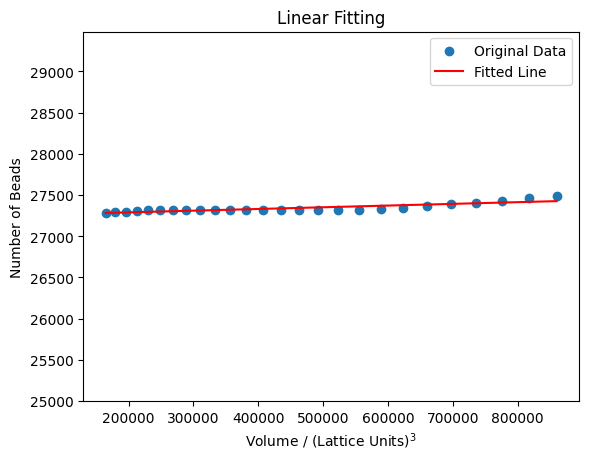

0.00020651739811104148
0.00020651739811104148


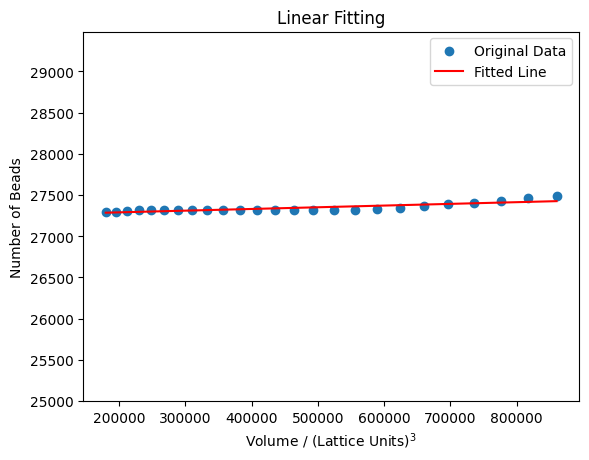

0.00020578777757931574
0.00020578777757931574


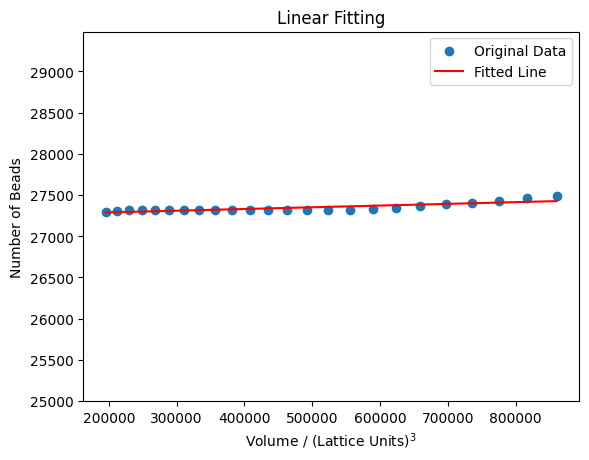

0.00020796942680673008
0.00020796942680673008


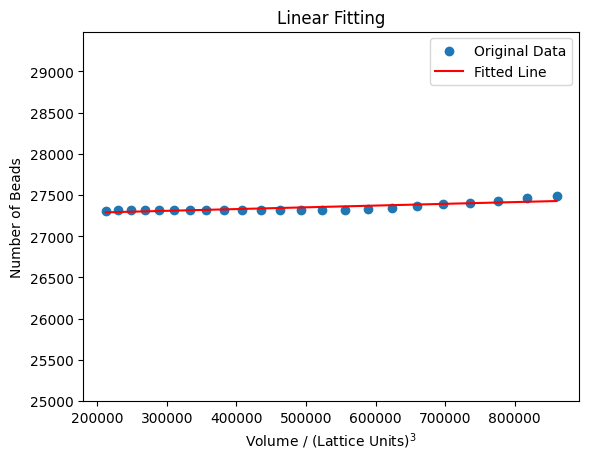

0.00021188229926097376
0.00021188229926097376


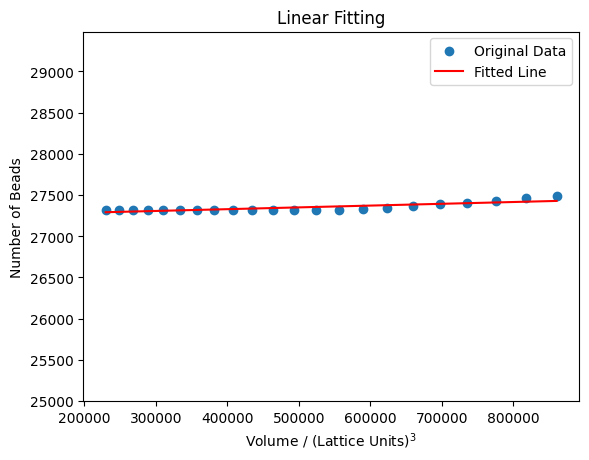

0.00021725807894861098
0.00021725807894861098


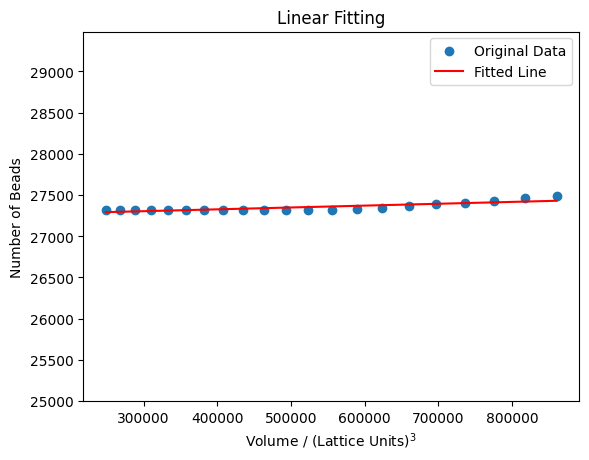

0.00022564440686814285
0.00022564440686814285


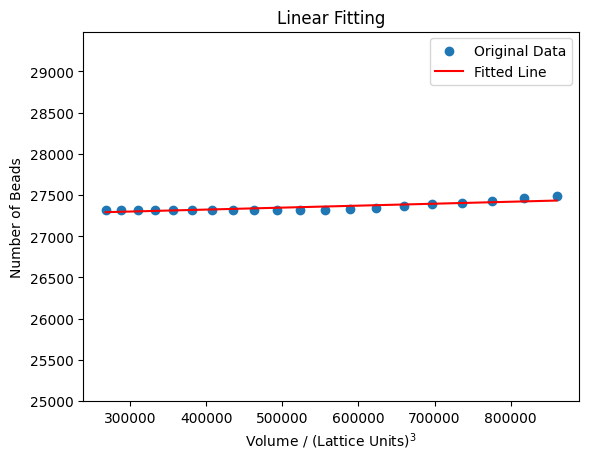

0.00023794332703449658
0.00023794332703449658


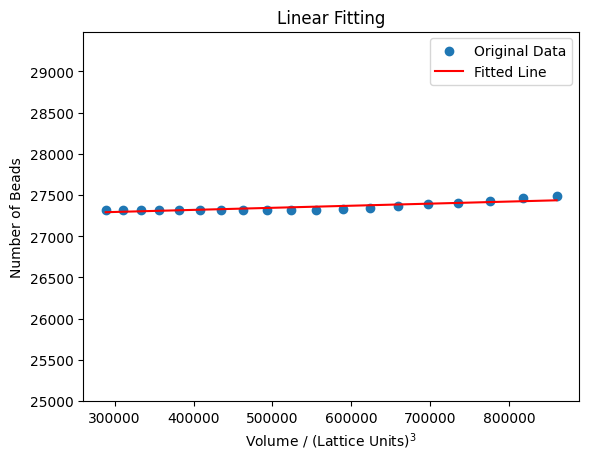

0.0002525274946927051
0.0002525274946927051


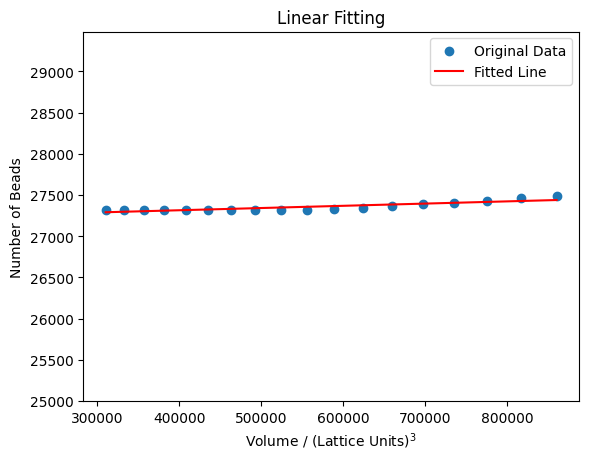

0.0002694121113615377
0.0002694121113615377


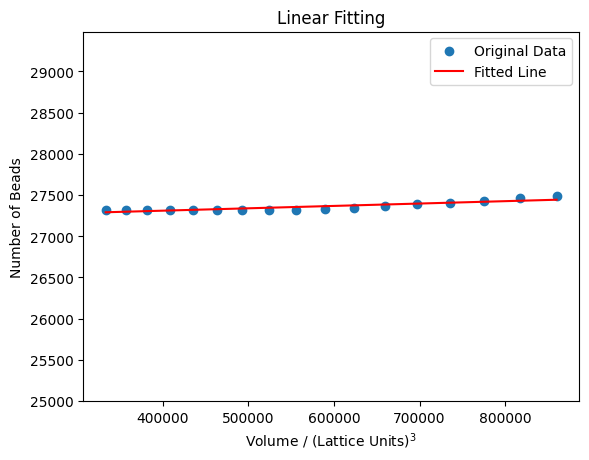

0.0002884980348888292
0.0002884980348888292


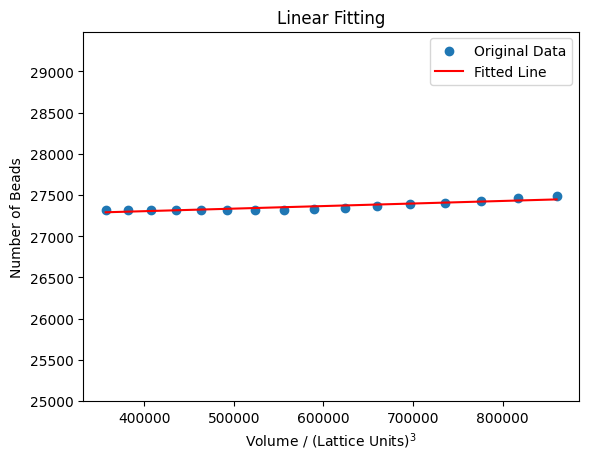

0.0003101377597068961
0.0003101377597068961


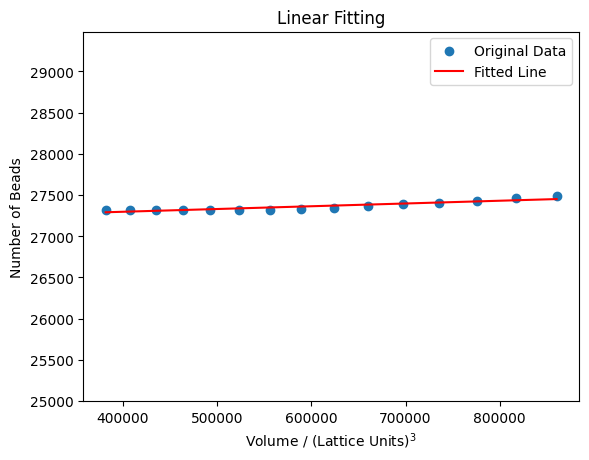

0.00033473264425747855
0.00033473264425747855


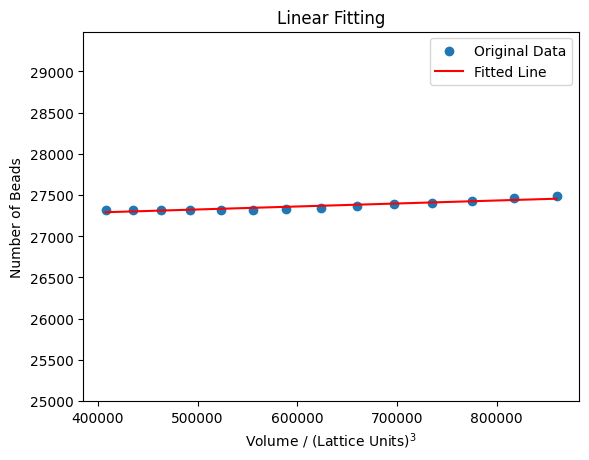

0.0003627213483157542
0.0003627213483157542


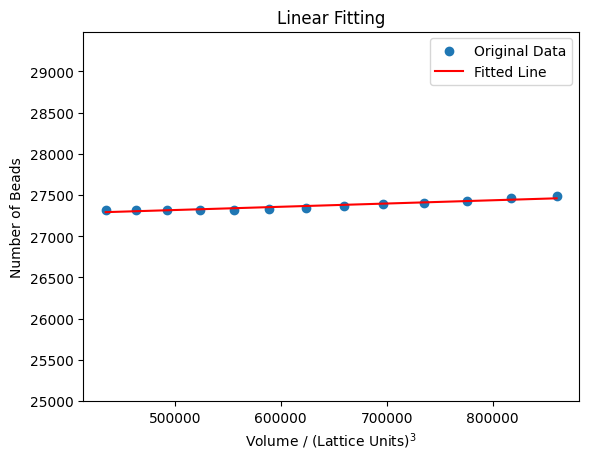

0.0003945420999043537
0.0003945420999043537


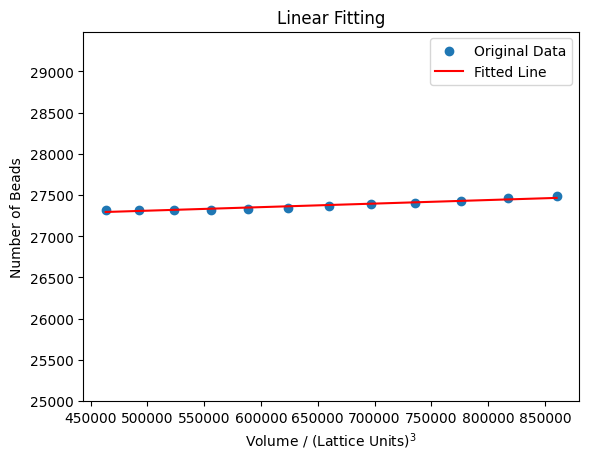

0.00043053584841124735
0.00043053584841124735


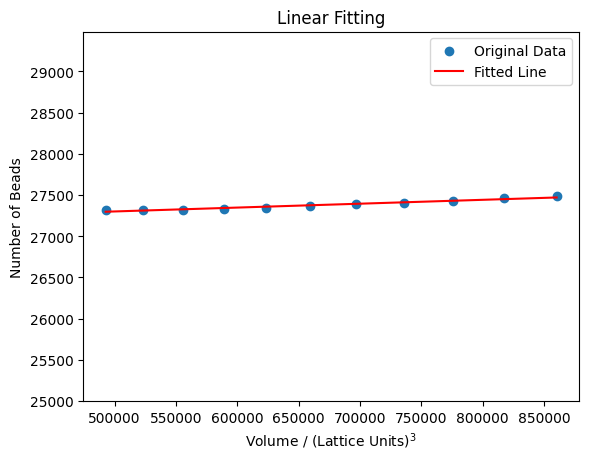

0.0004707153223484157
0.0004707153223484157


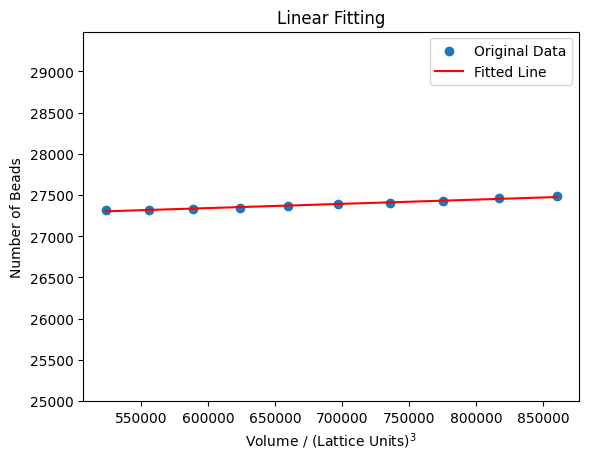

0.0005142225984950626
0.0005142225984950626


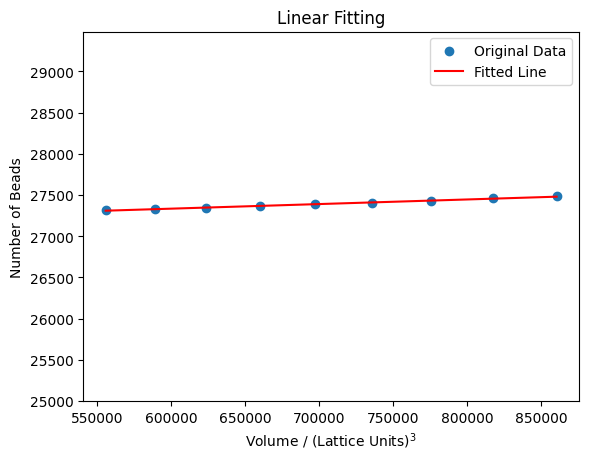

0.0005580333030741429
0.0005580333030741429


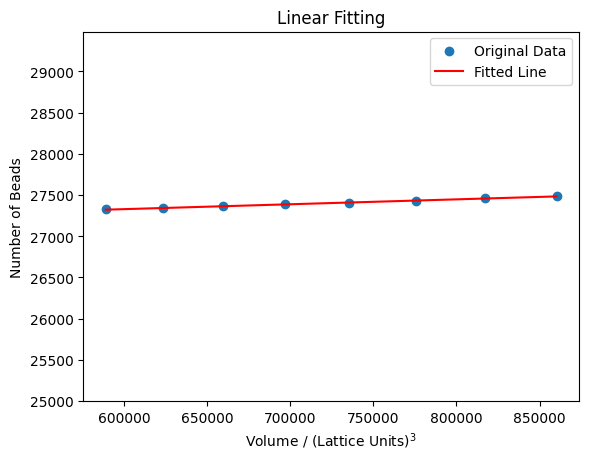

0.0005937310546492845
0.0005937310546492845


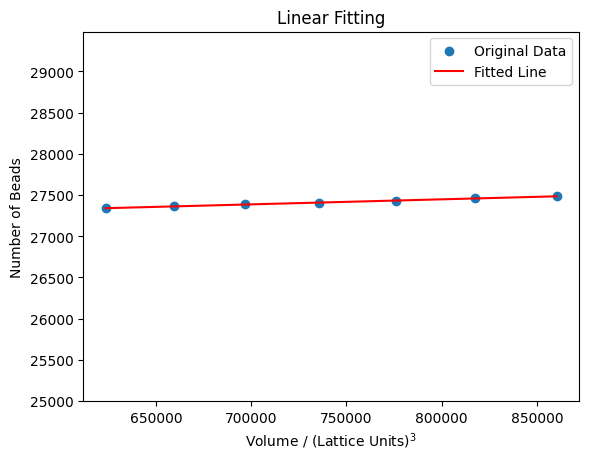

0.0006092271810197122
0.0006092271810197122


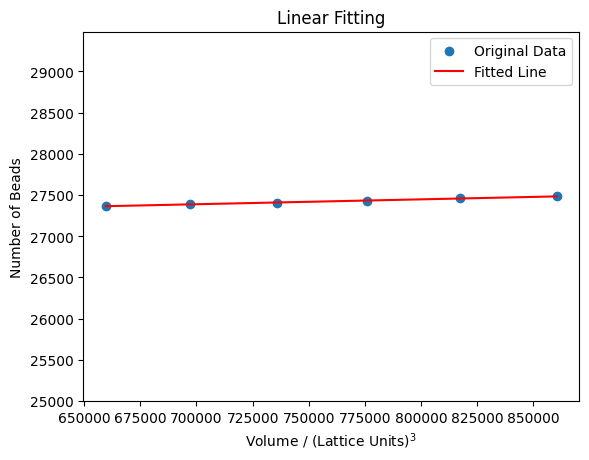

0.0005920345044524277
0.0005920345044524277


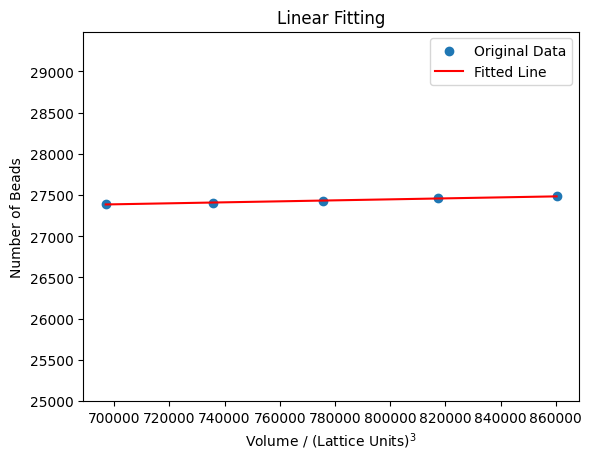

0.0006003340458940548
0.0006003340458940548


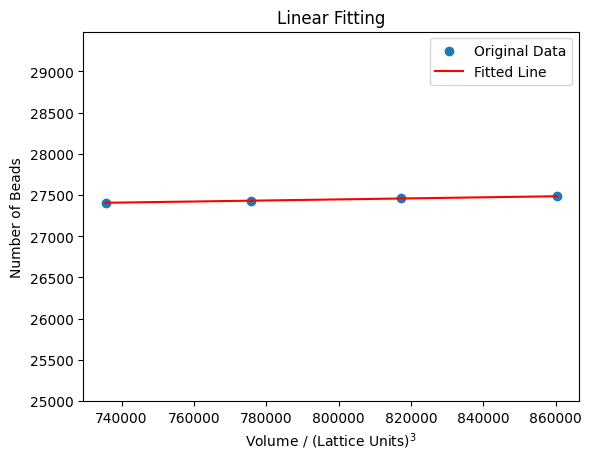

0.0006349623416112128
0.0006349623416112128


In [ ]:
dil_dict = {}
for i in range(30, len(particle_counts)-3):
  new_volumes = volumes[i:]
  new_particle_counts = particle_counts[i:]
  dil_slope, dil_intercept = fit_and_plot_y_axis(new_volumes, new_particle_counts, i)
  print(dil_slope)
keys_list = list(dil_dict.keys())
values_list = list(dil_dict.values())

keys_str_list = list(map(str, keys_list))
values_str_list = list(map(str, values_list))

keys_string = ' '.join(keys_str_list)
values_string = ' '.join(values_str_list)

path = 'den_dil_concs.text'

with open(path, 'w') as file:
      file.write(f"The dense phase concentration is: {slope}\nThe dilute phase concentrations are: {values_string}\nThe indexes to the list are: {keys_string}")

In [ ]:
kink_3x = res.x[0]*2
above_threshold_volumes = [volume for volume in volumes if volume > kink_3x]
print(len(above_threshold_volumes))
print(len(volumes))
length = (len(volumes))- len(above_threshold_volumes)
particle_counts_2 = particle_counts[30:]
new_volumes = volumes[30:]
new_particle_counts = particle_counts[30:]
print(new_volumes)

#dil_slope, dil_intercept = fit_and_plot_y_axis(new_volumes, new_particle_counts)
print(dil_slope)

30
59
[124788.24899079136, 137258.27743044044, 150532.55358940852, 164636.21020892428, 179594.3800302165, 195432.19579451383, 212174.79024304505, 229847.29611703882, 248474.8461577239, 268082.573106329, 288695.60970408283, 310339.0886922141, 333038.1428119516, 356817.9048045239, 381703.5074111598, 407720.0833730881, 434892.7654315374, 463246.6863277365, 492806.97880291403, 523598.7755982988, 555647.2094551194, 588977.4131146048, 623614.5193179834, 659583.6608064842, 696909.9703213357, 735618.5806037667, 775734.624395006, 817283.2344362822, 860289.5434688241]
-2.89339195307828e-17


In [ ]:
keys_list = list(dil_dict.keys())
values_list = list(dil_dict.values())

keys_str_list = list(map(str, keys_list))
values_str_list = list(map(str, values_list))

keys_string = ' '.join(keys_str_list)
values_string = ' '.join(values_str_list)

path = 'den_dil_concs.text'

with open(path, 'w') as file:
      file.write(f"The dense phase concentration is: {slope}\nThe dilute concentrations are: {values_string}\nThe indexes to the list are: {keys_string}")


In [ ]:
print(slope)

0.5594928009657472


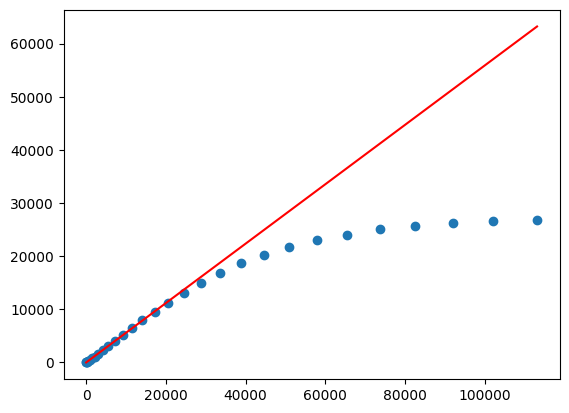

[18 19 20 21 22 23 24 25 26 27 28 29]
4008.949903275043
9.854789224775812


In [ ]:
st_2 = 0
ed_2 = 30
truncated_particle_counts_2 = np.array(particle_counts[st_2:ed_2])
truncated_volumes_2 = np.array(volumes[st_2:ed_2])
fitted_line = np.polyval([slope, intercept], truncated_volumes_2)
plt.scatter(truncated_volumes_2, truncated_particle_counts_2, label='Original Data')
plt.plot(truncated_volumes_2, fitted_line, label='Fitted Line', color='red')
plt.savefig('linear_semi_full_data.png')
plt.show()

delta = 1000
deviation_indices = np.where(np.abs(truncated_particle_counts_2 - fitted_line) > delta)[0]
print(deviation_indices)
key = 11
den_volume = fitted_line[key]
#den_rad = 12
print(den_volume)
den_rad = (den_volume*3/(math.pi*4))** (1/3)
print(den_rad)


[   0.72927668   39.36618937 -268.51952844  471.33333333]


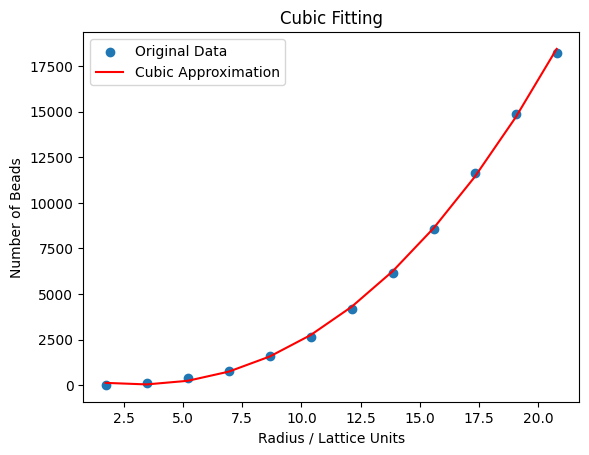

In [ ]:
st = 0
ed = 12
x_data  = radii[st:ed]
y_data = particle_counts[st:ed]

coefficients = np.polyfit(x_data, y_data, 3)
poly_cubic = np.poly1d(coefficients)

print(coefficients)

plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, poly_cubic(x_data), label='Cubic Approximation', color='red')
plt.xlabel(f'Radius / Lattice Units')
plt.ylabel('Number of Beads')
plt.legend()
plt.title(f'Cubic Fitting')

plt.savefig('cubic_approx_NEW.png')
plt.show()

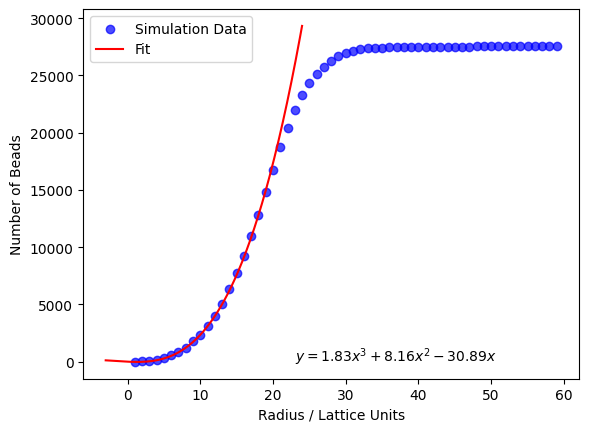

In [ ]:
x_data_whole  = radii
y_data_whole = particle_counts

st = 0
ed = 12
x_data  = radii[st:ed]
y_data = particle_counts[st:ed]

coefficients = np.polyfit(x_data, y_data, 3)
coefficients[3] = 0
poly_cubic = np.poly1d(coefficients)

x_values_cubic = np.linspace(st-3, ed+12, 500)  # Replace start and end with your desired range
y_values_cubic = np.polyval(coefficients, x_values_cubic)


plt.scatter(x_data_whole, y_data_whole, label='Simulation Data', color='blue', alpha=0.7, marker = 'o')
plt.plot(x_values_cubic, y_values_cubic, label='Fit', color='red')
plt.xlabel(f'Radius / Lattice Units')
plt.ylabel('Number of Beads')
plt.legend()
cubic_eq_str = f'y = {poly_cubic[0]:.2f}x^3 + {poly_cubic[1]:.2f}x^2 + {poly_cubic[2]:.2f}x + {poly_cubic[3]:.2f}'
plt.text(23, 30, f'$y = {coefficients[0]:.2f}x^3 + {coefficients[1]:.2f}x^2 {coefficients[2]:.2f}x$', fontsize=10, color='black')


plt.savefig('D_NEW_cubic_deviation.png')
plt.show()

In [ ]:
print(radii)

[1.7320508075688772, 3.4641016151377544, 5.196152422706632, 6.928203230275509, 8.660254037844386, 10.392304845413262, 12.12435565298214, 13.856406460551018, 15.588457268119894, 17.32050807568877, 19.05255888325765, 20.784609690826528, 22.516660498395407, 24.24871130596428, 25.98076211353316, 27.712812921102035, 29.444863728670914, 31.176914536239792, 32.90896534380867, 34.64101615137754, 36.37306695894642, 38.1051177665153, 39.837168574084174, 41.56921938165305, 43.30127018922193, 45.033320996790806, 46.76537180435968, 48.497422611928556, 50.22947341949744, 51.96152422706631, 53.69357503463519, 55.42562584220407, 57.157676649772945, 58.88972745734182, 60.6217782649107, 62.35382907247958, 64.08587988004845, 65.81793068761733, 67.54998149518622, 69.2820323027551, 71.01408311032397, 72.74613391789285, 74.47818472546173, 76.2102355330306, 77.94228634059948, 79.67433714816836, 81.40638795573723, 83.13843876330611, 84.870489570875, 86.60254037844386, 88.33459118601274, 90.06664199358161, 91.

In [ ]:
x_fit = x_data_whole#[st:]
y_fit = y_data_whole#[st:]
# Define the delta
delta = 500

y_values_curve = np.polyval(coefficients, x_fit)


deviation_indices = np.where(np.abs(y_fit - np.polyval(coefficients, x_fit)) > delta)[0]
print(deviation_indices)
key = 12
den_rad = x_fit[key]
#den_rad = 12
print(den_rad)


[ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103]
22.516660498395407


In [ ]:
seqs = ['Sequence_WT_2']
runs = ['Run_1']
temps = ['50.0']
runs_n = 1
import math
for i in list(seqs):
    sequence_with_space = i.replace('_', ' ')
    for temp in list(temps):
        distances_per_temp = []  # Collect distances for each run at a specific temperature
        for j in range(1, runs_n + 1):
            run_path = f'Run_{j}'
            file_path = f'results_trj.lammpstrj'

             # Initialize lists to store particle coordinates
            x_coords, y_coords, z_coords = [], [], []
            start_processing = False

            # Open the file and read lines
            with open(file_path, 'r') as file:
                for line in file:
                    if line.startswith('ITEM: TIMESTEP'):
                        timestep_value = next(file).strip()

                        if timestep_value == '2402000000':
                            start_processing = True
                        else:
                            start_processing = False
                            continue

                    if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
                        continue

                    if start_processing:
                        items = line.split()
                        if len(items) >= 7:
                            x_coords.append(float(items[3]))
                            y_coords.append(float(items[4]))
                            z_coords.append(float(items[5]))

            x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
            coordinates = np.column_stack((x_coords, y_coords, z_coords))
            center = np.array([60, 60, 60])

            # Calculate distances for the current run
            distances = np.linalg.norm(coordinates - center, axis=1)
            distances = np.abs(distances)
            distances = np.sqrt((x_coords - 60)**2 + (y_coords - 60)**2 + (z_coords - 60)**2)

            distances_per_temp.append(distances)

            den_count = np.sum(distances <= den_rad)
print(den_count)
den_vol = (den_rad**3)*4/3*math.pi
dil_count = (209*132)-den_count
dil_vol = 120**3 - den_vol
dil_conc = dil_count/dil_vol
dil_conc = format(dil_conc)
den_conc = slope
print(den_conc)
print(dil_conc)

formatted_output = f'Radius of Dense Phase: {den_rad}\nDense Phase concentration: {den_conc}\nDilute Phase concentration: {dil_conc}\nNumber of beads in Dense Phase: {den_count}\nNumber of beads in Dilute Phase: {dil_count}\nPoints used in cubic approximation: {st},{ed}\nPoints used in linear approximation: {st_1},{ed_1} '

with open('KEY_DATA.txt', 'w') as file:
    file.write(formatted_output)

21358
0.5349906680190767
0.0037079338618126057
